# Laboratorio - Iris Flower Classification
### Lilia Lobato
##### 17/03/2022
Utilizando el data set de Iris, realice un clasificador usando Regresión Logística para los tres tipos de flores Iris-Setosa, Iris-Versicolor e Iris-Virgínica.

## 1. Lectura de Datos
El conjunto de datos de Iris se utilizó en el artículo clásico de R.A. Fisher de 1936, "The Use of Multiple Measurements in Taxonomic Problems", y también se puede encontrar en el Repositorio de Aprendizaje Automático de la UCI.  
Incluye tres especies de iris con 50 muestras cada una, así como algunas propiedades sobre cada flor. Una especie de flor es linealmente separable de las otras dos, pero las otras dos no son linealmente separables entre sí.

![OverviewIris.png](https://miro.medium.com/max/1400/1*f6KbPXwksAliMIsibFyGJw.png) 
  
Obtenemos los datos desde: [Kaggle Iris Species](https://www.kaggle.com/datasets/uciml/iris)

In [1]:
# Read data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./Iris/Iris.csv')

### Estructura de los datos  
Contamos con 150 flores, 50 de cada especia, con la siguiente información:
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm 
* PetalWidthCm

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


En "Species" se encuentran la respuestas correctas de cada flor.  
* Iris-setosa
* Iris-versicolor
* Iris-virginica 

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


El conjunto de datos está ordenado por la columna "Species" en el orden Iris-setosa, -versicolor, -viriginica. Por lo tanto, tenemos que revolver el conjunto de datos para asegurar una distribución uniforme de las clases al dividir el conjunto de datos en conjunto de entrenamiento y de prueba. 

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = df.sample(frac=1, random_state=42)
df.set_index("Id", inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
74,6.1,2.8,4.7,1.2,Iris-versicolor
19,5.7,3.8,1.7,0.3,Iris-setosa
119,7.7,2.6,6.9,2.3,Iris-virginica
79,6.0,2.9,4.5,1.5,Iris-versicolor
77,6.8,2.8,4.8,1.4,Iris-versicolor


### Data Exploration

Como podemos ver en los histogramas, las características "SepalLengthCm" y "SepalWidthCm" tienen una distribución gaussiana. Sin embargo, las características "PetalLengthCm" y "PetalWidthCm" tienen valores considerablemente bajos seguido de un espacio sin valores y finalmente otra distribución normal.

El hecho de que haya muchos valores bajos y luego una brecha tanto para la longitud como para la anchura de los pétalos nos puede dar a entender que una de las flores tiene tamaños de pétalos completamente diferente a los de las otras dos flores.

In [6]:
df.hist(bins=18, figsize=(15,10))

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

Para lograr un buen modelo, vamos a analizar cuales son las características con mayor correlación:

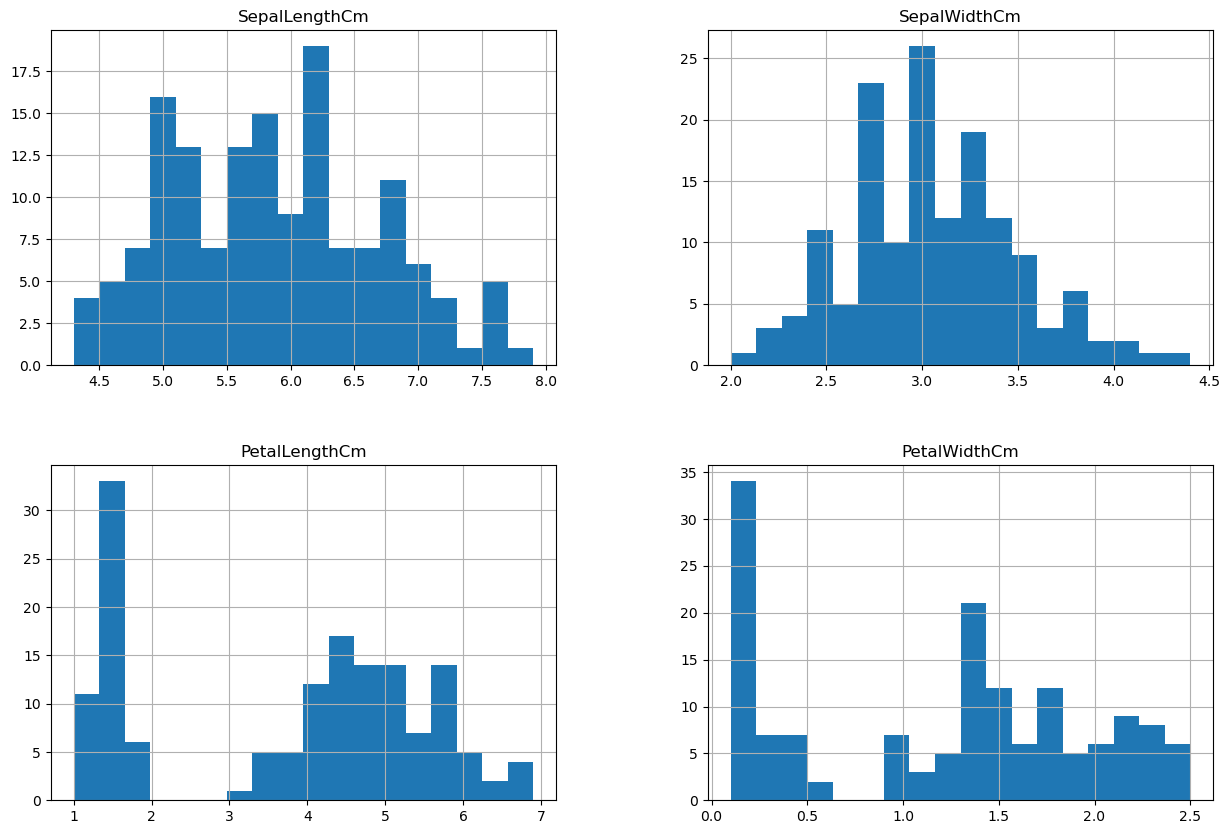

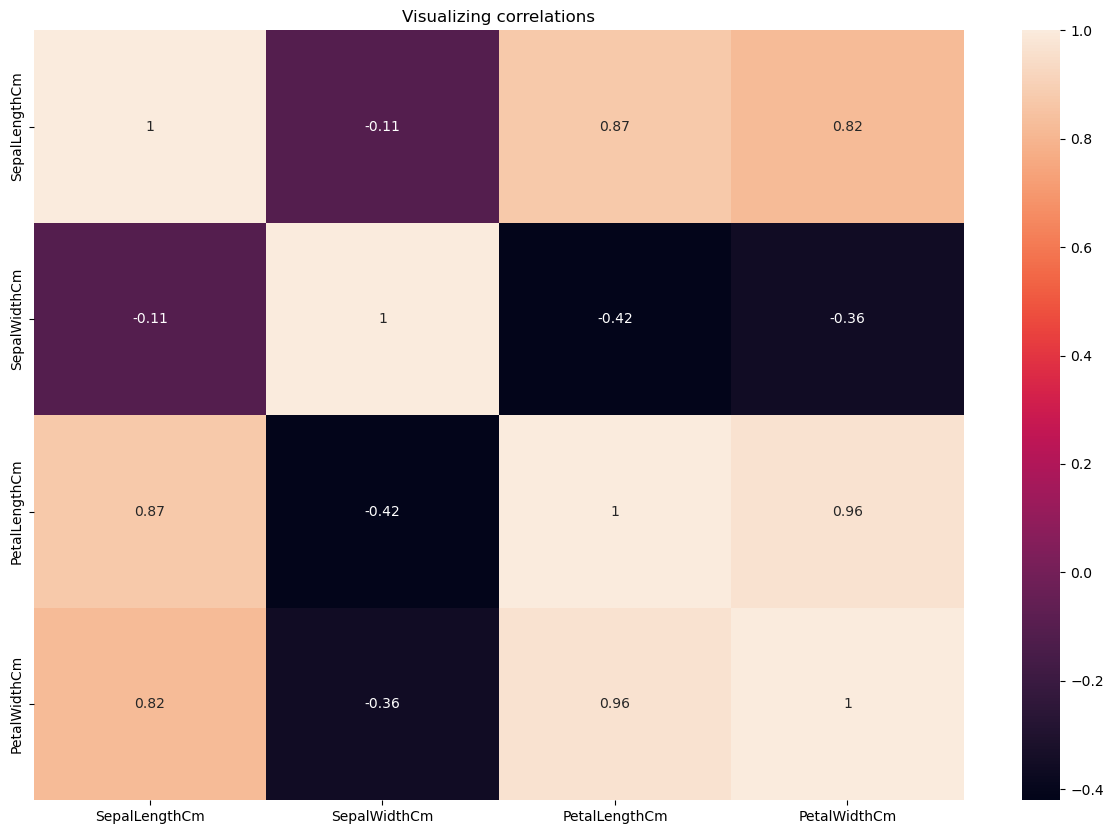

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Visualizing correlations')
plt.show()

Estas tres combinaciones de características tienen los coeficientes de correlación más altos, que van de 82% a 96%. 
* PetalLengthCm x PetalWidthCm = 96%  
* SepalLengthCm x PetalLengthCm = 87%  
* SepalLengthCm x PetalWidthCm = 82%  

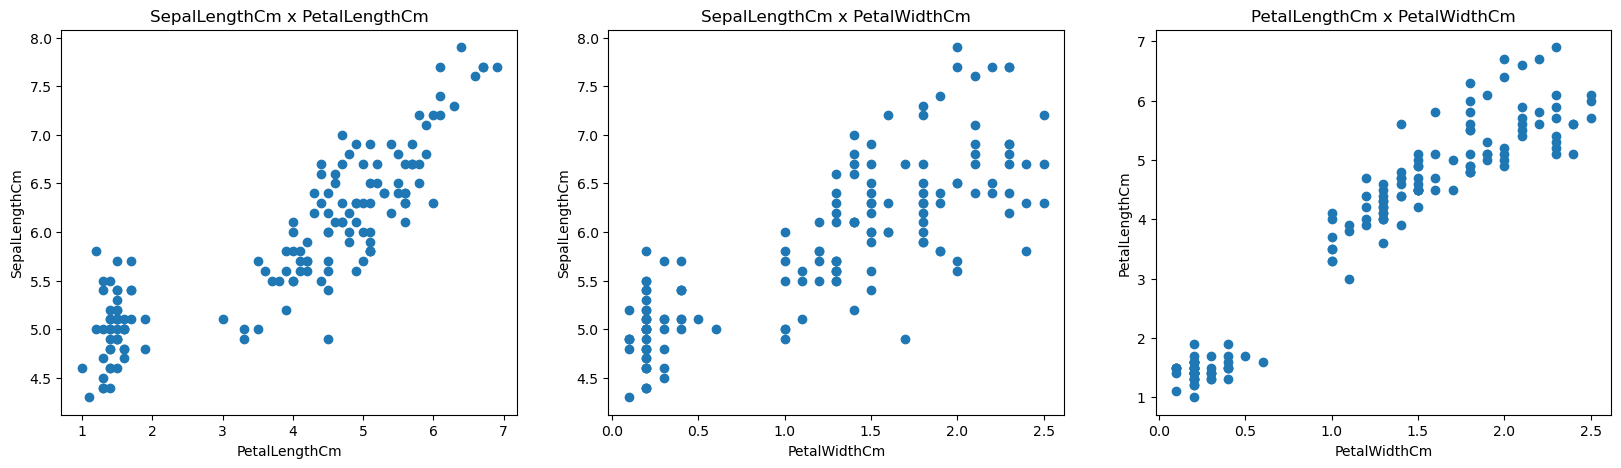

In [8]:
plt.figure(figsize=(20, 5))

features = ['PetalLengthCm', 'PetalWidthCm','PetalWidthCm']
targets = ['SepalLengthCm', 'SepalLengthCm','PetalLengthCm']
target = df['SepalLengthCm']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[features[i]]
    y = df[targets[i]]
    plt.scatter(x, y, marker='o')
    plt.title(targets[i]+' x '+features[i])
    plt.xlabel(features[i])
    plt.ylabel(targets[i])
plt.show()

## 2. Data Preprocessing
Iris ya tiene la información libre de valores nulos, dentro de una escala y lsta para trabajar.  
Lo que falta es separar los datos de entrada y las etiquetas:
- X => datos de entrada
- y => datos del target o etiquetas con la respuesta

In [9]:
X, y = df.drop("Species", axis=1), df.Species

In [10]:
# Because I will use the logistic regression model, it is necessary to normalize the data.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

### División de Datos (30-70, 50-50 and 70-30).
#### Con qué tamaño de los data sets se lograron los mejores resultados para el Test Set? 

In [11]:
from sklearn.model_selection import train_test_split

"""Training the model with 70% of the data."""
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, train_size=0.7, random_state=101)

"""Training the model with 50% of the data."""
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, train_size=0.5, random_state=101)

"""Training the model with 30% of the data."""
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, train_size=0.3, random_state=101)

## 3. Creación de Modelos
Por cada conjunto de datos, creamos un modelo.

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg_70 = LogisticRegression()
log_reg_50 = LogisticRegression()
log_reg_30 = LogisticRegression()

#### Ajustar el Modelo con Datos Históricos 

In [13]:
log_reg_70.fit(X_train_70, y_train_70)
log_reg_50.fit(X_train_50, y_train_50)
log_reg_30.fit(X_train_30, y_train_30)

LogisticRegression()

#### Score Model 

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

scores_70 = cross_val_score(log_reg_70, X_train_70, y_train_70, cv=4, scoring="accuracy")
scores_50 = cross_val_score(log_reg_50, X_train_50, y_train_50, cv=4, scoring="accuracy")
scores_30 = cross_val_score(log_reg_30, X_train_30, y_train_30, cv=4, scoring="accuracy")

data = [[scores_70.mean(),scores_50.mean(),scores_30.mean()],
        [scores_70.std(),scores_50.std(),scores_30.std()]]
col_name = ['70%', '50%', '30%']

pd.DataFrame(data, columns = col_name,
             index=["Mean", "STD"])

,70%,50%,30%
Mean,0.962607,0.973684,0.958333
STD,0.045365,0.026316,0.072169


#### Predicción para Datos Nuevos

In [15]:
y_test_predict_70 = log_reg_70.predict(X_test_70)
y_test_predict_50 = log_reg_50.predict(X_test_50)
y_test_predict_30 = log_reg_30.predict(X_test_30)

#### Score Predictions for New Data

In [16]:
from sklearn.metrics import accuracy_score

data = [[accuracy_score(y_test_70, y_test_predict_70) * 100, 
         accuracy_score(y_test_50, y_test_predict_50) * 100, 
         accuracy_score(y_test_30, y_test_predict_30) * 100]]
col_name = ['70%', '50%', '30%']

pd.DataFrame(data, columns = col_name,
             index=["Score"])

,70%,50%,30%
Score,93.333333,86.666667,89.52381


Como podemos ver, el modelo que se entrenó con el 70% de los datos fue el más preciso. Por lo tanto, en la siguiente prueba, utilizaré el 70% de los datos en la fase de entrenamiento.

## 4. Try the classifier with only one of the variables.

In [17]:
#I'm separate the keys for better readability
keys = df.keys()
keys = keys.drop('Species')
keys

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [18]:
from itertools import combinations
def training_comb(df, keys, n, penalty='l2', solver='lbfgs', l1_ratio=None) -> list:

    scores = []
    
    for key in combinations(keys, n):    
    #Separate our feature from the dataset
        X = df[list(key)]
        
        #Mix the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)

        #Create the model
        log_reg = LogisticRegression(penalty=penalty, solver=solver, l1_ratio=l1_ratio)
        
        #Train the model
        log_reg.fit(X_train, y_train)
        
        #Appending the results to our scores list
        scr = cross_val_score(log_reg, X_train, y_train, cv=4, scoring="accuracy")
        scores.append((key, scr))
                
    return scores

In [19]:
scores = training_comb(df, keys, 1)
for key, score in scores:
    print(f'Score using {key}:\t{score.mean()*100}%')

Score using ('SepalLengthCm',):	77.13675213675214%
Score using ('SepalWidthCm',):	56.232193732193736%
Score using ('PetalLengthCm',):	93.37606837606837%
Score using ('PetalWidthCm',):	94.33760683760684%


Las 2 características que obtienen mejores puntuaciones son PetalWidthCm y PetalLength. Esto demuestra que el tamaño del pétalo está relacionado con la especie.

## 5. Prueba el clasificador utilizando todas las combinaciones de las características

### 2 Características

In [20]:
scores = training_comb(df, keys, 2)
for key, score in scores:
    print(f'Score using {key}:\t{score.mean()*100}%')

Score using ('SepalLengthCm', 'SepalWidthCm'):	81.94444444444446%
Score using ('SepalLengthCm', 'PetalLengthCm'):	94.33760683760684%
Score using ('SepalLengthCm', 'PetalWidthCm'):	92.41452991452992%
Score using ('SepalWidthCm', 'PetalLengthCm'):	93.37606837606837%
Score using ('SepalWidthCm', 'PetalWidthCm'):	94.30199430199431%
Score using ('PetalLengthCm', 'PetalWidthCm'):	98.14814814814815%


Las 2 características que obtienen mejores puntuaciones son PetalLengthCm y PetalWidthCm.

### 3 Características

In [21]:
scores = training_comb(df, keys, 3)
for key, score in scores:
    print(f'Score using {key}:\t{score.mean()*100}%')

Score using ('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'):	92.41452991452992%
Score using ('SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm'):	94.33760683760684%
Score using ('SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'):	97.1866096866097%
Score using ('SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'):	96.26068376068376%


Las 3 características que obtienen mejores puntuaciones son SepalLengthCm, PetalLengthCm y PetalWidthCm.

### Con qué combinaciones de variables se lograron los mejores resultados?
Como es de esperar, el uso de las características del tamaño de los pétalos arroja mejores resultados que el tamaño de los sépalos, alcanzando un 97% de precisión. Sin embargo, si se utiliza sólo la longitud del pétalo se obtiene la misma precisión que si se utilizan todas las características. Por ello, podemos concluir que la longitud del pétalo es la característica más importante, y quizá la única necesaria.

## Try the classifier with all the penalities methods and without them.
### Cómo se lograron los mejores resultados?  
Usando elasticnet

In [22]:
import warnings
warnings.filterwarnings('ignore')

penalties = [
    ('l2', 'lbfgs', None), 
    ('l1', 'saga', None), 
    ('elasticnet', 'saga', 0.5), 
    ('none', 'lbfgs', None)
]

for penalty, solver, l1_ratio in penalties:
    key, score = training_comb(df, keys, 4, penalty=penalty, solver=solver, l1_ratio=l1_ratio)[0]
    
    print(f'Score using {penalty}:\t{score.mean()* 100}%')

Score using l2:	96.26068376068376%
Score using l1:	97.15099715099716%
Score using elasticnet:	98.11253561253561%
Score using none:	96.18945868945869%
